# The Game beyond NFL

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Reading the data and feature selection

In [30]:
df = pd.read_csv('data/imputed_data.csv')
# Check the first few rows to verify the structure
df.head()

,Name,Position,College,Round,Pick,Stat URL,Height,Weight,40 Yard Dash,Bench Press,...,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,Year
0,Emmanuel Acho,OLB,Texas,6,204,https://www.sports-reference.com/cfb/players/e...,74.0,238.0,4.64,24.00,...,5.29,199.20,1282.58,8.83,14.91,239.71,1747.91,8.22,20.20,2012
1,Joe Adams,WR,Arkansas,4,104,https://www.sports-reference.com/cfb/players/j...,71.0,179.0,4.51,14.59,...,8.50,4.00,69.50,11.65,0.00,96.00,1393.50,14.45,8.50,2012
2,Chas Alecxih,DT,Pittsburgh,0,0,https://www.sports-reference.com/cfb/players/c...,76.0,296.0,5.31,19.00,...,0.00,1.19,5.20,-0.68,0.36,1.36,5.55,0.86,0.36,2012
3,Frank Alexander,DE,Oklahoma,4,103,https://www.sports-reference.com/cfb/players/f...,76.0,270.0,4.80,24.48,...,2.17,22.98,75.37,4.12,4.24,36.81,231.59,6.49,6.41,2012
4,Antonio Allen,S,South Carolina,7,242,https://www.sports-reference.com/cfb/players/a...,73.0,210.0,4.58,17.00,...,1.68,374.69,2061.25,4.94,19.21,420.39,2397.36,6.43,20.89,2012


In [31]:
df.columns.values

array(['Name', 'Position', 'College', 'Round', 'Pick', 'Stat URL',
       'Height', 'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump',
       'Broad Jump', '3 Cone Drill', 'Shuttle', 'conf_abbr', 'games',
       'seasons', 'tackles_solo', 'tackles_assists', 'tackles_total',
       'tackles_loss', 'sacks', 'def_int', 'def_int_yds', 'def_int_td',
       'pass_defended', 'fumbles_rec', 'fumbles_rec_yds',
       'fumbles_rec_td', 'fumbles_forced', 'rec', 'rec_yds',
       'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'Year'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df['Position'])
label

array([14, 21,  5, ...,  5,  6,  5])

In [33]:
df.drop("Position", axis=1, inplace=True)
df["Position"] = label

In [34]:
df.drop("Stat URL", axis=1, inplace=True)

In [35]:
df.drop("Year", axis=1, inplace=True)

In [36]:
df.drop("Name", axis=1, inplace=True)

In [37]:
df.drop("College", axis=1, inplace=True)

In [38]:
df.drop("conf_abbr",axis=1,inplace=True)

In [39]:
df["Round"] = df["Round"].map(lambda x: 1/(1 + x))

In [40]:
df["Pick"] = df["Pick"].map(lambda x: 1/(1 + x))

In [41]:
df.columns.values

array(['Round', 'Pick', 'Height', 'Weight', '40 Yard Dash', 'Bench Press',
       'Vertical Jump', 'Broad Jump', '3 Cone Drill', 'Shuttle', 'games',
       'seasons', 'tackles_solo', 'tackles_assists', 'tackles_total',
       'tackles_loss', 'sacks', 'def_int', 'def_int_yds', 'def_int_td',
       'pass_defended', 'fumbles_rec', 'fumbles_rec_yds',
       'fumbles_rec_td', 'fumbles_forced', 'rec', 'rec_yds',
       'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'Position'], dtype=object)

In [42]:
df.head()

,Round,Pick,Height,Weight,40 Yard Dash,Bench Press,Vertical Jump,Broad Jump,3 Cone Drill,Shuttle,...,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,Position
0,0.142857,0.004878,74.0,238.0,4.64,24.00,35.50,118.00,7.13,4.28,...,5.29,199.20,1282.58,8.83,14.91,239.71,1747.91,8.22,20.20,14
1,0.200000,0.009524,71.0,179.0,4.51,14.59,36.00,123.00,7.09,4.12,...,8.50,4.00,69.50,11.65,0.00,96.00,1393.50,14.45,8.50,21
2,1.000000,1.000000,76.0,296.0,5.31,19.00,25.50,99.00,7.74,4.62,...,0.00,1.19,5.20,-0.68,0.36,1.36,5.55,0.86,0.36,5
3,0.200000,0.009615,76.0,270.0,4.80,24.48,31.13,115.26,7.19,4.48,...,2.17,22.98,75.37,4.12,4.24,36.81,231.59,6.49,6.41,3
4,0.125000,0.004115,73.0,210.0,4.58,17.00,34.00,118.00,7.02,4.25,...,1.68,374.69,2061.25,4.94,19.21,420.39,2397.36,6.43,20.89,19


In [43]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='YlOrRd')

,Round,Pick,Height,Weight,40 Yard Dash,Bench Press,Vertical Jump,Broad Jump,3 Cone Drill,Shuttle,games,seasons,tackles_solo,tackles_assists,tackles_total,tackles_loss,sacks,def_int,def_int_yds,def_int_td,pass_defended,fumbles_rec,fumbles_rec_yds,fumbles_rec_td,fumbles_forced,rec,rec_yds,rec_yds_per_rec,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,Position
Round,1.000000,0.973460,-0.067902,-0.089816,0.071431,-0.126660,-0.071442,-0.059875,0.009962,0.037007,-0.015030,0.057390,-0.003942,-0.001207,-0.002941,-0.069933,-0.089097,0.013928,0.015143,-0.028830,-0.002540,-0.001236,0.011750,0.019096,-0.035340,-0.000042,-0.008150,0.007690,-0.020165,0.020255,0.013859,0.000907,0.012226,0.019885,0.007428,0.013203,0.000120,0.056097
Pick,0.973460,1.000000,-0.086651,-0.102752,0.087066,-0.139674,-0.095506,-0.083214,0.015757,0.045866,-0.000233,0.085602,0.007013,0.009414,0.008416,-0.080435,-0.105873,0.017399,0.019697,-0.034803,-0.000530,0.004147,0.008324,0.021208,-0.036980,-0.004505,-0.017712,0.001037,-0.033501,0.029026,0.020522,0.001354,0.018928,0.027250,0.007462,0.005485,-0.001219,0.065030
Height,-0.067902,-0.086651,1.000000,0.699247,0.558811,0.394923,-0.384103,-0.384980,0.487619,0.508317,-0.417703,-0.338000,-0.452117,-0.256673,-0.389967,0.031393,0.167998,-0.463762,-0.390957,-0.243251,-0.459519,-0.130372,-0.272103,-0.333306,-0.131597,-0.299976,-0.223828,-0.092864,-0.162954,-0.436010,-0.457795,-0.387078,-0.408228,-0.507112,-0.551998,-0.107983,-0.491123,-0.071286
Weight,-0.089816,-0.102752,0.699247,1.000000,0.835130,0.724522,-0.618406,-0.692371,0.815447,0.796615,-0.585279,-0.502428,-0.646397,-0.357751,-0.553601,0.015711,0.160128,-0.666684,-0.546361,-0.313232,-0.683923,-0.192547,-0.338302,-0.480252,-0.250542,-0.529781,-0.470313,-0.409898,-0.415742,-0.351489,-0.375595,-0.545050,-0.321651,-0.481592,-0.628216,-0.451029,-0.551935,-0.230252
40 Yard Dash,0.071431,0.087066,0.558811,0.835130,1.000000,0.543357,-0.728508,-0.796166,0.806633,0.796327,-0.576934,-0.484265,-0.605544,-0.360718,-0.529632,-0.107125,0.003934,-0.561873,-0.464616,-0.268083,-0.630203,-0.195788,-0.307407,-0.463535,-0.315134,-0.507031,-0.467349,-0.467491,-0.433114,-0.225776,-0.253686,-0.519812,-0.211159,-0.353199,-0.517258,-0.502087,-0.455843,-0.200489
Bench Press,-0.126660,-0.139674,0.394923,0.724522,0.543357,1.000000,-0.355294,-0.435963,0.546699,0.517426,-0.342800,-0.291779,-0.408736,-0.153117,-0.318676,0.178636,0.272948,-0.531864,-0.444215,-0.238470,-0.540990,-0.062772,-0.247386,-0.357616,-0.106177,-0.477995,-0.449165,-0.355159,-0.400374,-0.205895,-0.221651,-0.401268,-0.173568,-0.324911,-0.476088,-0.439778,-0.399341,-0.255533
Vertical Jump,-0.071442,-0.095506,-0.384103,-0.618406,-0.728508,-0.355294,1.000000,0.839557,-0.664664,-0.678232,0.429444,0.370855,0.467289,0.287886,0.412819,0.135610,0.054164,0.393409,0.313954,0.203457,0.443941,0.165857,0.239800,0.317573,0.242359,0.394166,0.369613,0.421861,0.352793,0.131486,0.157868,0.401426,0.119428,0.231040,0.370220,0.415671,0.319932,0.099815
Broad Jump,-0.059875,-0.083214,-0.384980,-0.692371,-0.796166,-0.435963,0.839557,1.000000,-0.712417,-0.707721,0.461669,0.406217,0.504055,0.302136,0.441678,0.118810,0.033870,0.439250,0.354741,0.223921,0.482391,0.181993,0.256861,0.360371,0.264492,0.411189,0.391073,0.457939,0.373382,0.149045,0.177400,0.438899,0.139054,0.252817,0.401160,0.450016,0.351046,0.139791
3 Cone Drill,0.009962,0.015757,0.487619,0.815447,0.806633,0.546699,-0.664664,-0.712417,1.000000,0.886175,-0.579829,-0.487497,-0.606618,-0.379425,-0.538292,-0.137536,-0.018151,-0.545576,-0.454954,-0.280018,-0.591332,-0.215714,-0.287863,-0.419702,-0.320371,-0.440511,-0.394674,-0.416523,-0.366651,-0.221846,-0.243712,-0.444977,-0.206296,-0.331492,-0.462865,-0.414531,-0.411994,-0.145119
Shuttle,0.037007,0.045866,0.508317,0.796615,0.796327,0.517426,-0.678232,-0.707721,0.886175,1.000000,-0.569645,-0.467011,-0.602601,-0.383729,-0.537662,-0.139755,-0.017464,-0.536229,-0.439261,-0.270755,-0.581011,-0.220924,-0.293

## Estimating the DAG using Structural Learning

In [44]:
from pgmpy.estimators import PC

In [45]:
est = PC(data=df)

In [ ]:
model = est.estimate(variant="stable", max_cond_vars=2, return_type="dag")

In [23]:
model = est.estimate(
    variant="stable",
    ci_test="chi_square",  # or "g_sq" for G-test
    significance_level=0.01,
    max_cond_vars=4,
    return_type="dag"
)

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting
Working for n conditional variables: 4: 100%|██████████| 4/4 [23:34<00:00, 353.54s/it]


<Axes: >

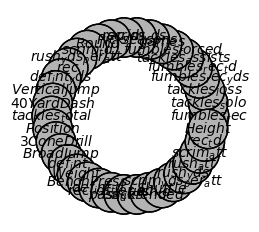

In [25]:
model_graphviz = model.to_daft()
model_graphviz.render()

In [35]:
estimated_dag = est.estimate(
    variant="stable",                
    ci_test="chi_square",            
    max_cond_vars=5,                 
    return_type="dag",               
    significance_level=0.01,         
    n_jobs=-1,                       
    show_progress=True               
)

Working for n conditional variables: 5: 100%|██████████| 5/5 [23:49<00:00, 285.82s/it]


<Axes: >

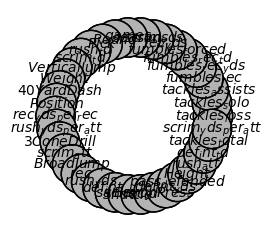

In [40]:
estimated_dag_graphiz = estimated_dag.to_daft()
estimated_dag_graphiz.render()

In [41]:
estimated_dag_1 = est.estimate(
    variant="parallel",                
    ci_test="g_sq",            
    max_cond_vars=5,                 
    return_type="dag",               
    significance_level=0.01,         
    n_jobs=-1,                       
    show_progress=True               
)

Working for n conditional variables: 2:  40%|████      | 2/5 [00:32<00:48, 16.26s/it]


<Axes: >

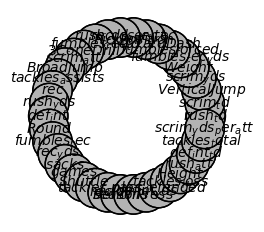

In [42]:
estimated_dag_1_graphiz = estimated_dag_1.to_daft()
estimated_dag_1_graphiz.render()

In [46]:
estimated_dag_2 = est.estimate(
    variant="parallel",                
    ci_test="pearsonr",            
    max_cond_vars=5,                 
    return_type="dag",               
    significance_level=0.01,         
    n_jobs=-1,                       
    show_progress=True               
)

Working for n conditional variables: 5: 100%|██████████| 5/5 [00:51<00:00, 10.34s/it]


<Axes: >

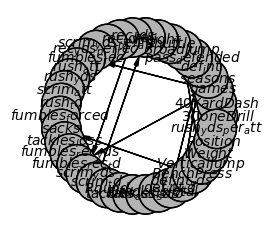

In [47]:
estimated_dag_2_graphiz = estimated_dag_2.to_daft()
estimated_dag_2_graphiz.render()

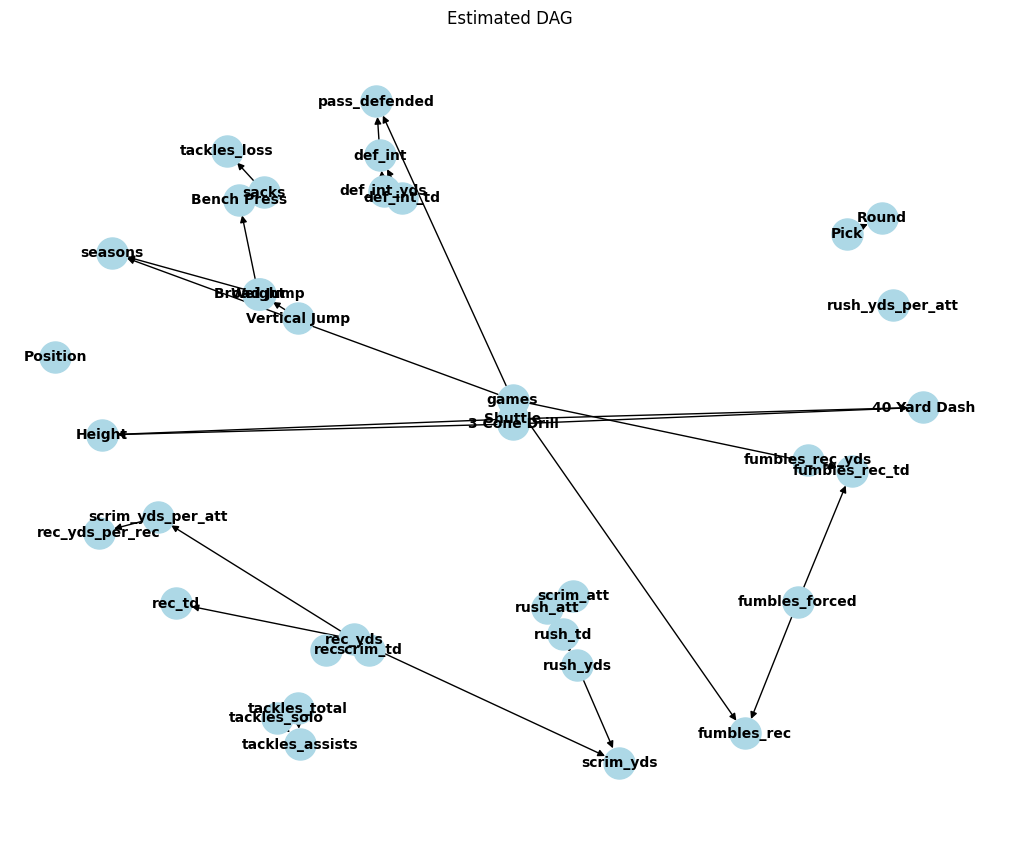

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(estimated_dag_2)


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Consistent layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, arrows=True, 
        font_size=10, font_weight='bold')
plt.title("Estimated DAG")
plt.show()

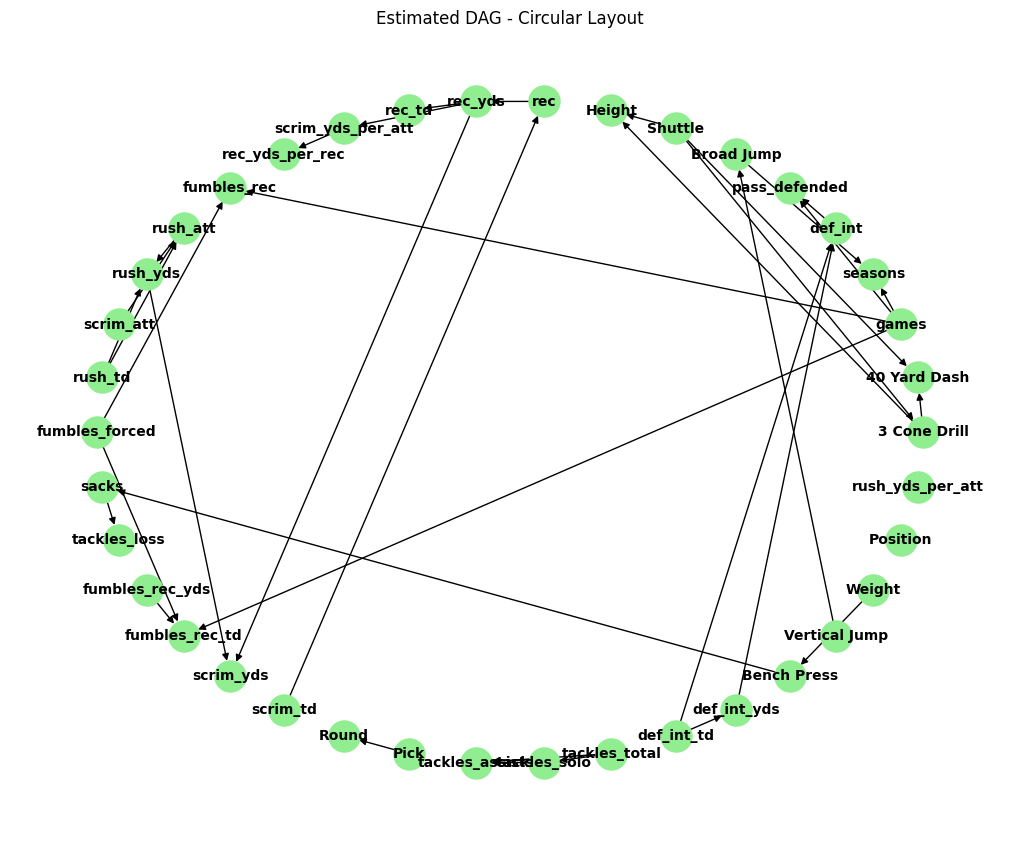

In [85]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a directed graph from the estimated DAG
G = nx.DiGraph(estimated_dag_2)

# Plot using a circular layout
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G)  # Circular layout
nx.draw(G, pos, with_labels=True, node_color='lightgreen', 
    node_size=500, arrows=True, 
    font_size=10, font_weight='bold')
plt.title("Estimated DAG - Circular Layout")
plt.show()

In [87]:
from pyvis.network import Network

# Create a pyvis network
net = Network(notebook=True, height='750px', width='100%', directed=True)

# Add nodes and edges from the estimated DAG
for node in estimated_dag_2.nodes:
    net.add_node(node, label=node)

for edge in estimated_dag_2.edges:
    net.add_edge(edge[0], edge[1])

# Customize the appearance
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 16,
      "bold": true
    },
    "shape": "dot",
    "size": 10
  },
  "edges": {
    "arrows": {
      "to": {
        "enabled": true,
        "scaleFactor": 1
      }
    },
    "color": {
      "inherit": true
    },
    "smooth": {
      "enabled": false
    },
    "font": {
      "size": 14,
      "bold": true
    },
    "length": 200
  },
  "physics": {
    "enabled": true,
    "barnesHut": {
      "gravitationalConstant": -8000,
      "springLength": 100
    }
  }
}
""")

# Show the network
net.show("estimated_dag.html")

estimated_dag.html


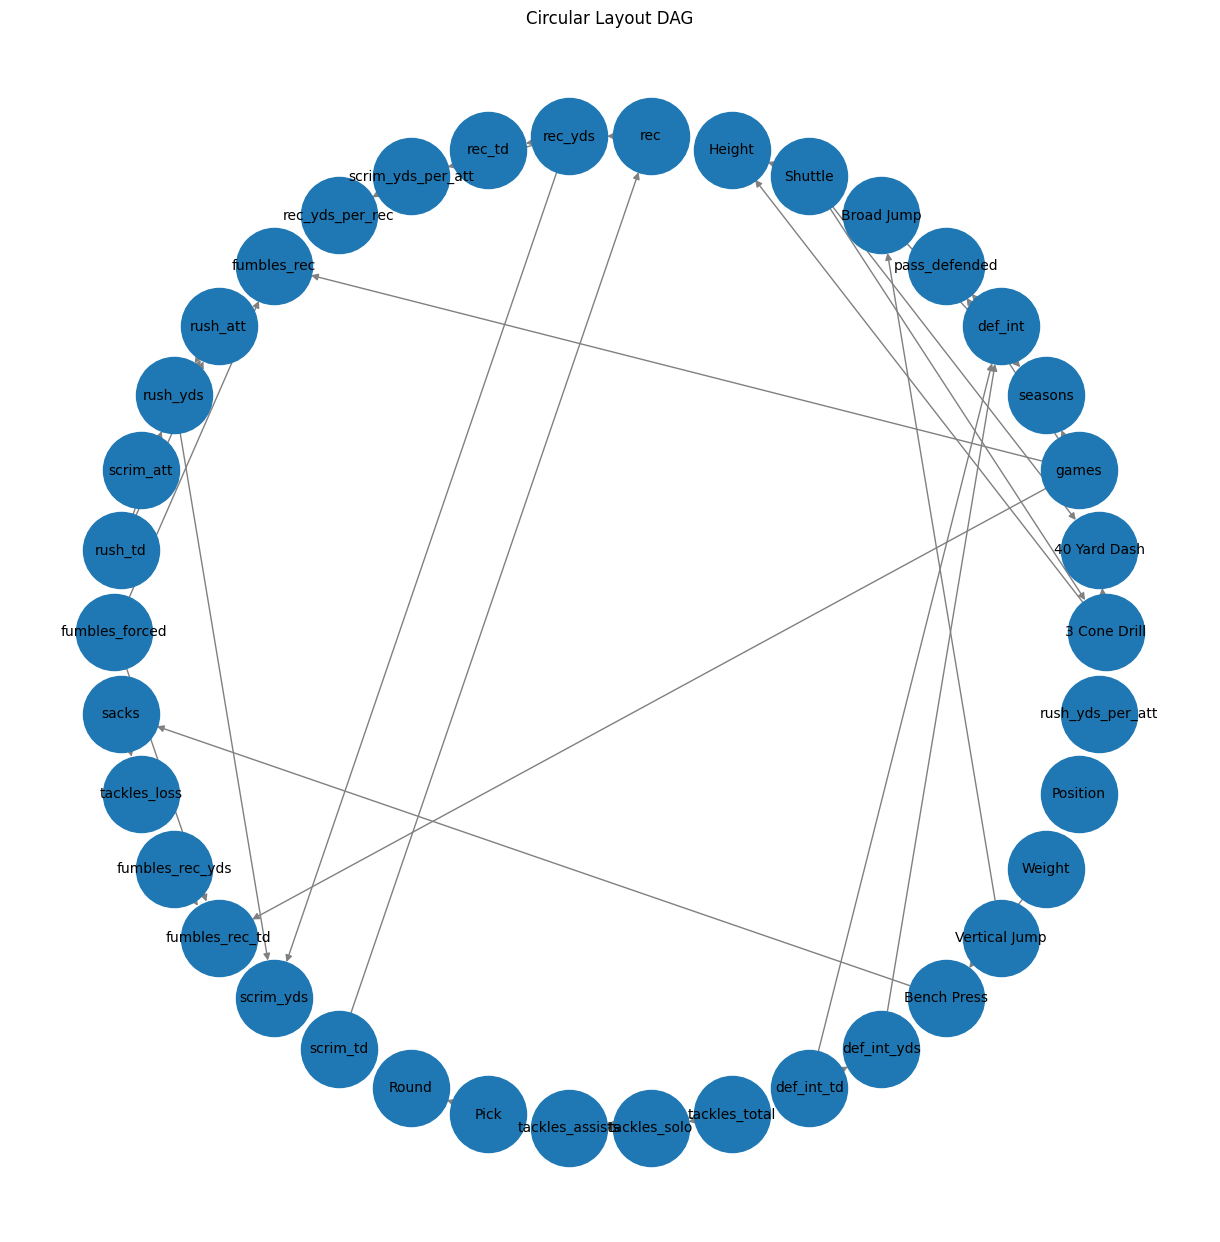

In [50]:
pos = nx.circular_layout(estimated_dag_2)

plt.figure(figsize=(12, 12))
nx.draw(
    estimated_dag_2, pos, with_labels=True, node_size=3000, font_size=10, edge_color="gray"
)
plt.title("Circular Layout DAG")
plt.show()

# Exporting DAG

In [ ]:
import pandas as pd


edges = list(estimated_dag_2.edges)


dag_df = pd.DataFrame(edges, columns=["Source", "Target"])


dag_df.to_csv("dag_edges.csv", index=False)

print("DAG successfully exported to 'dag_edges.csv'")

DAG successfully exported to 'dag_edges.csv'


# Using pgmpy for ATE Estimation

In [170]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import CausalInference

# Defining the Bayesian Network (DAG) 
game1 = BayesianNetwork([
    ('pass_defended', 'seasons'),
    ('3 Cone Drill', '40 Yard Dash'),
    ('3 Cone Drill', 'Height'),
    ('pass_defended', 'Pick'),
    ('games', 'seasons'),
    ('games', 'pass_defended'),
    ('games', 'fumbles_rec'),
    ('games', 'fumbles_rec_td'),
    ('def_int', 'pass_defended'),
    ('Broad Jump', 'seasons'),
    ('Shuttle', 'Height'),
    ('Shuttle', '40 Yard Dash'),
    ('Shuttle', '3 Cone Drill'),
    ('rec', 'rec_yds'),
    ('rec_yds', 'rec_td'),
    ('rec_yds', 'scrim_yds_per_att'),
    ('rec_yds', 'scrim_yds'),
    ('scrim_yds_per_att', 'rec_yds_per_rec'),
    ('rush_att', 'rush_yds'),
    ('rush_yds', 'scrim_yds'),
    ('scrim_att', 'rush_att'),
    ('rush_td', 'rush_att'),
    ('rush_td', 'rush_yds'),
    ('fumbles_forced', 'fumbles_rec'),
    ('fumbles_forced', 'fumbles_rec_td'),
    ('sacks', 'tackles_loss'),
    ('fumbles_rec_yds', 'fumbles_rec_td'),
    ('scrim_td', 'rec'),
    ('tackles_solo', 'tackles_assists'),
    ('tackles_total', 'tackles_assists'),
    ('tackles_total', 'tackles_solo'),
    ('def_int_td', 'def_int'),
    ('def_int_td', 'def_int_yds'),
    ('def_int_yds', 'def_int'),
    ('Bench Press', 'sacks'),
    ('Vertical Jump', 'Broad Jump'),
    ('Pick', 'Round'),
    ('Weight', 'Bench Press')
])

inference = CausalInference(model=game1)

# Estimate ATE for treatment ("3 Cone Drill") and outcome ("Pick")
ate = inference.estimate_ate("pass_defended", "Pick", data=df, estimator_type="linear")
print("Average Treatment Effect (ATE):", ate)


Average Treatment Effect (ATE): -3.600435747001281e-05


In [171]:
print("edges",game1.edges)

edges [('pass_defended', 'seasons'), ('pass_defended', 'Pick'), ('3 Cone Drill', '40 Yard Dash'), ('3 Cone Drill', 'Height'), ('Pick', 'Round'), ('games', 'seasons'), ('games', 'pass_defended'), ('games', 'fumbles_rec'), ('games', 'fumbles_rec_td'), ('def_int', 'pass_defended'), ('Broad Jump', 'seasons'), ('Shuttle', 'Height'), ('Shuttle', '40 Yard Dash'), ('Shuttle', '3 Cone Drill'), ('rec', 'rec_yds'), ('rec_yds', 'rec_td'), ('rec_yds', 'scrim_yds_per_att'), ('rec_yds', 'scrim_yds'), ('scrim_yds_per_att', 'rec_yds_per_rec'), ('rush_att', 'rush_yds'), ('rush_yds', 'scrim_yds'), ('scrim_att', 'rush_att'), ('rush_td', 'rush_att'), ('rush_td', 'rush_yds'), ('fumbles_forced', 'fumbles_rec'), ('fumbles_forced', 'fumbles_rec_td'), ('sacks', 'tackles_loss'), ('fumbles_rec_yds', 'fumbles_rec_td'), ('scrim_td', 'rec'), ('tackles_solo', 'tackles_assists'), ('tackles_total', 'tackles_assists'), ('tackles_total', 'tackles_solo'), ('def_int_td', 'def_int'), ('def_int_td', 'def_int_yds'), ('def_int

# Removing the do Edges

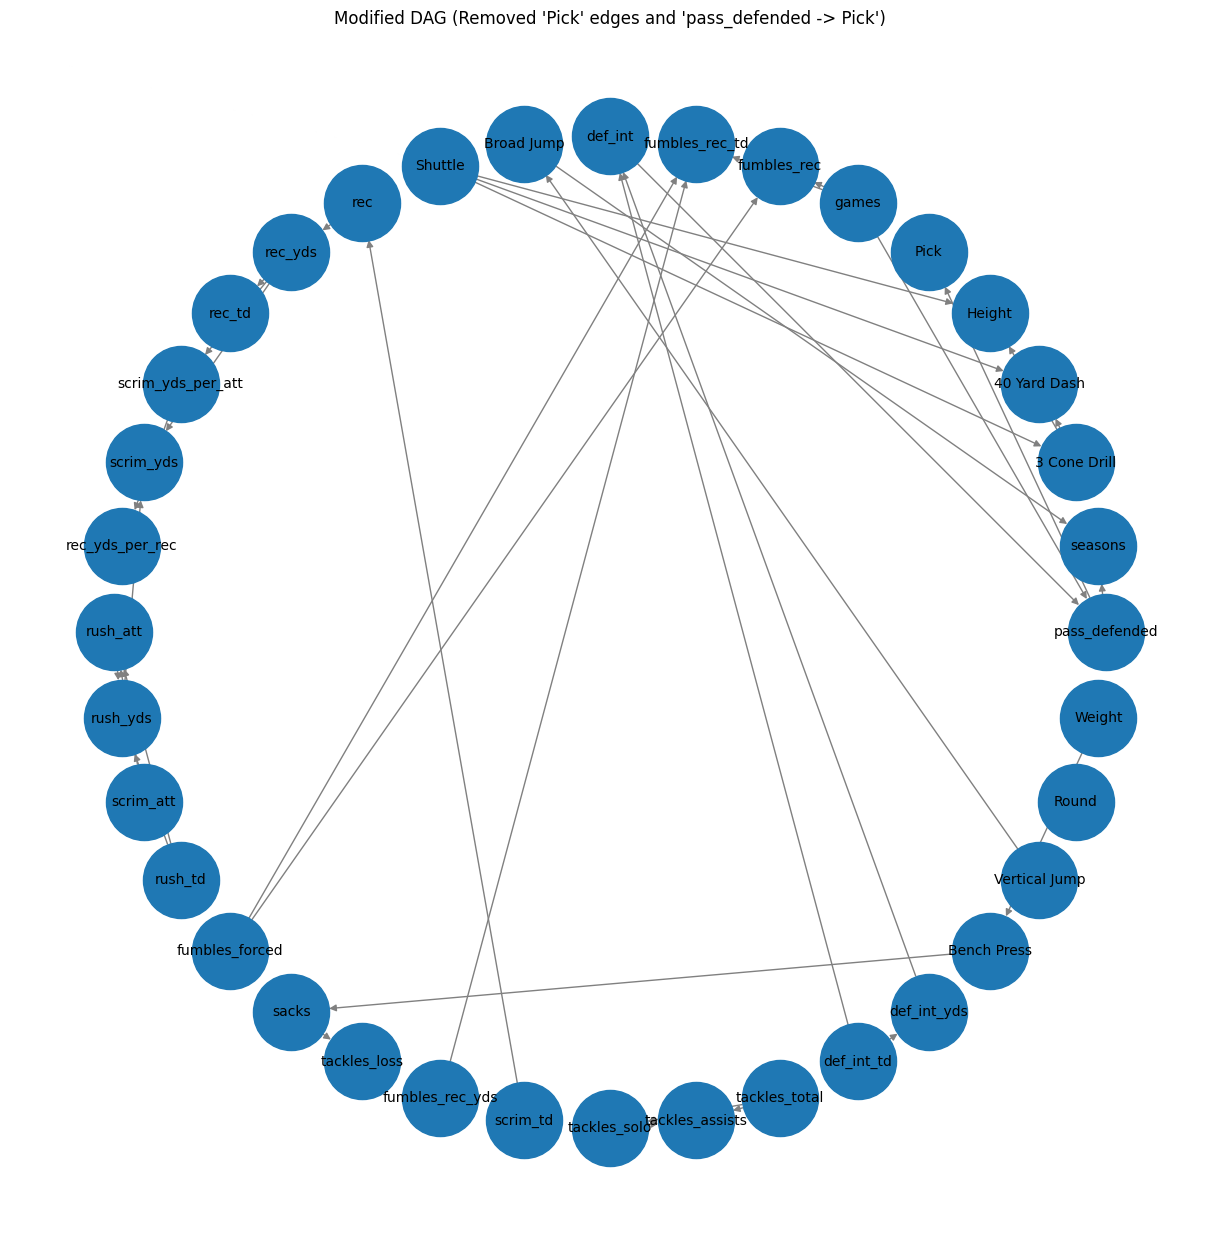

In [172]:
import networkx as nx

def remove_do_edges(graph, do_node):
    """ 
    Removes all edges originating from the specified 'do' node in the causal graph.
    """
    edges_to_remove = [(node1, node2) for node1, node2 in graph.edges if node1 == do_node]
    graph.remove_edges_from(edges_to_remove)
    return graph


G_modified = game1.copy()


G_modified = remove_do_edges(G_modified, "Pick")


if G_modified.has_edge("games", "seasons"):
    G_modified.remove_edge("games", "seasons")


import matplotlib.pyplot as plt

pos = nx.circular_layout(G_modified)
plt.figure(figsize=(12, 12))
nx.draw(
    G_modified, pos, with_labels=True, node_size=3000, font_size=10, edge_color="gray"
)
plt.title("Modified DAG (Removed 'Pick' edges and 'pass_defended -> Pick')")
plt.show()


# ATE Computation after removing the do edges

In [175]:
from pgmpy.models import BayesianModel

G_bayesian = BayesianModel(G_modified.edges)



if G_bayesian.has_edge("games", "seasons"):
    print("yes i exist")
else:
    print("no i dont exist")

no i dont exist


In [178]:
from pgmpy.inference import CausalInference

# Initialize CausalInference object with modified DAG
inference = CausalInference(model=G_bayesian)
# Estimate ATE (example for 'Shuttle' on 'Round')
ate = inference.estimate_ate("games", "seasons", data=df, estimator_type="linear")
print("ATE of Shuttle on Round (after modification):", ate)

ATE of Shuttle on Round (after modification): 0.014970756607648477


In [127]:
df.columns

Index(['Round', 'Pick', 'Height', 'Weight', '40 Yard Dash', 'Bench Press',
       'Vertical Jump', 'Broad Jump', '3 Cone Drill', 'Shuttle', 'games',
       'seasons', 'tackles_solo', 'tackles_assists', 'tackles_total',
       'tackles_loss', 'sacks', 'def_int', 'def_int_yds', 'def_int_td',
       'pass_defended', 'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td',
       'fumbles_forced', 'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td',
       'rush_att', 'rush_yds', 'rush_yds_per_att', 'rush_td', 'scrim_att',
       'scrim_yds', 'scrim_yds_per_att', 'scrim_td', 'Position'],
      dtype='object')